In [10]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [11]:
# Step 1: Generate synthetic data
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=1, noise=20.0)
y = y.reshape(-1, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


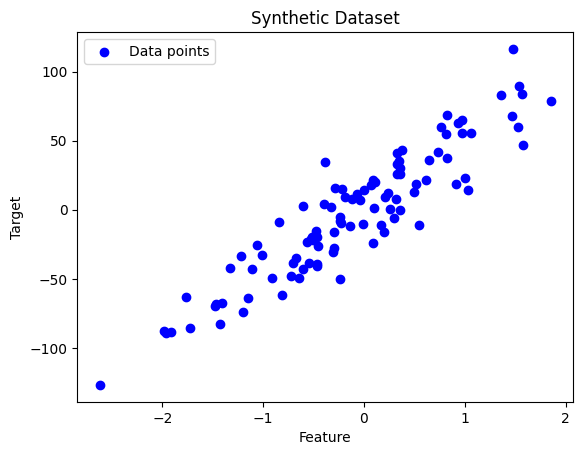

In [12]:
# Step 2: Visualize the dataset
plt.scatter(X, y, color="blue", label="Data points")
plt.title("Synthetic Dataset")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

In [13]:
# Step 3: Function to fit polynomial regression and visualize
def plot_polynomial_fit(degree):
    # Transform the features to the given polynomial degree
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate training and testing errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Determine observation label based on degree
    if degree == 1:
        observation = "Underfitting (High Bias)"
    elif degree == 3:
        observation = "Good Tradeoff"
    elif degree == 6:
        observation = "Overfitting Starts"
    elif degree == 9:
        observation = "Overfitting (High Variance)"
    else:
        observation = "Bias-Variance Behavior"

    # Plot the polynomial fit
    plt.scatter(X_train, y_train, color="blue", label="Training data")
    plt.scatter(X_test, y_test, color="green", label="Testing data")
    plt.plot(
        np.sort(X_train, axis=0),
        model.predict(poly.transform(np.sort(X_train, axis=0))),
        color="red",
        label=f"Polynomial degree {degree}",
    )
    plt.title(f"Polynomial Degree: {degree}\nObservation: {observation}")
    plt.xlabel("Feature")
    plt.ylabel("Target")
    plt.legend()
    plt.show()

    return train_error, test_error

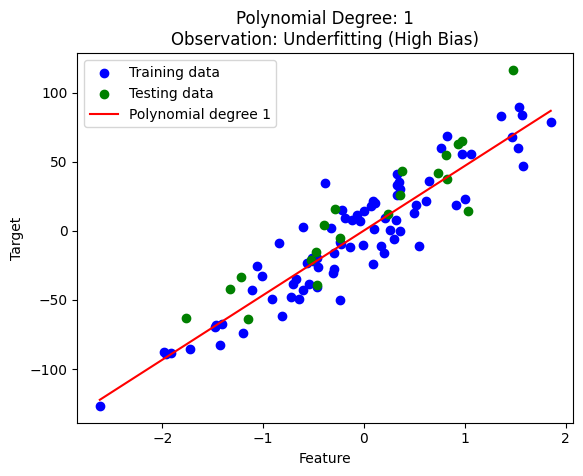

Degree 1: Train Error = 291.6901, Test Error = 416.8089


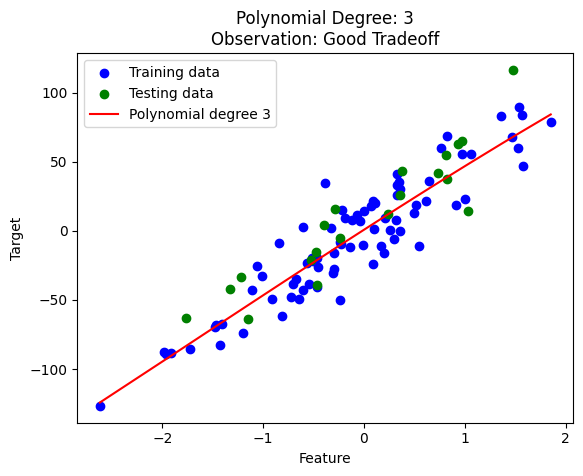

Degree 3: Train Error = 291.1768, Test Error = 422.3615


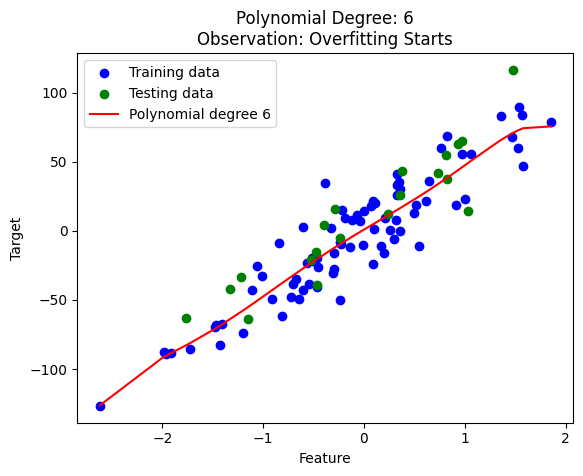

Degree 6: Train Error = 288.9550, Test Error = 417.2061


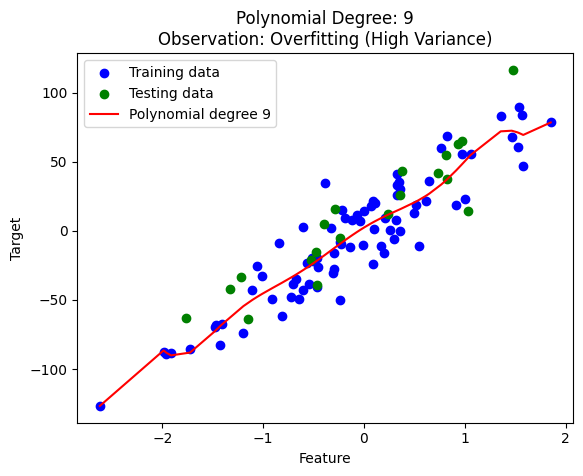

Degree 9: Train Error = 284.9124, Test Error = 435.7964


In [14]:
# Step 4: Analyze Bias-Variance Tradeoff
degrees = [1, 3, 6, 9]  # Degrees of the polynomial
train_errors = []
test_errors = []

for degree in degrees:
    train_error, test_error = plot_polynomial_fit(degree)
    train_errors.append(train_error)
    test_errors.append(test_error)
    print(f"Degree {degree}: Train Error = {train_error:.4f}, Test Error = {test_error:.4f}")

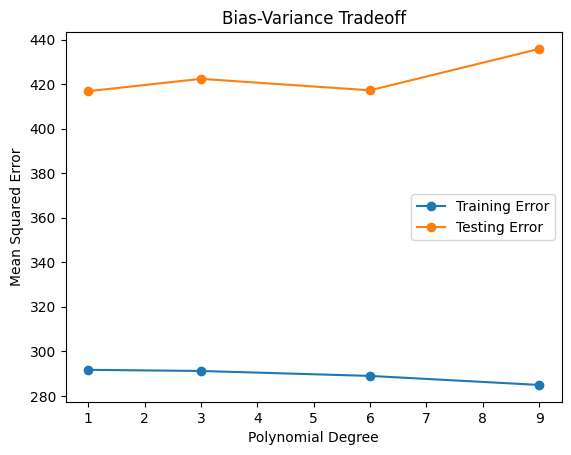

In [15]:
# Step 5: Plot training and testing errors
plt.plot(degrees, train_errors, label="Training Error", marker="o")
plt.plot(degrees, test_errors, label="Testing Error", marker="o")
plt.title("Bias-Variance Tradeoff")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()